# HOW2 

The following notebook will walk you through some basic python that will help you create triangles and graphs.
Make sure you **run all of the code blocks in the order they appear** in this notebook, as they can depend on each other.
I have tried to make the variable names as self explanatory as possible.

If a line starts with #, then it is a comment and will explain the code it surrounds.


## Imports
In the cell below, all that is happening is we are importing the packages we will be using in this tutorial 

In [252]:
%matplotlib inline
import matplotlib
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd

Where we have written e.g. ```import matplotlib.pyplot as plt``` all this means is we are importing it and renaming it under an alias we choose. This just makes our lives easier as when we want to call the function, we can just type ```plt``` instead of
the entire ```matplotlib.pyplot```

The ```%matplotlib inline``` allows us to view the graphs in this notebook

# Gross Premiums Received

In the section below, we will create triangles and graphs relating to the 'Gross Premiums Received' from the data in the data.csv file.

## Reading from a .csv File

In the cell below, we are reading the data in the .csv file into a DataFrame (using the ```pd.read_csv(FILENAME)``` function). A DataFrame is basically just a spreadsheet. You can name the dataframe anything, in this example, we have chosen the variable name df.

By default, the ```.dropna()``` function returns a new DataFrame and removes any rows that contain NA values. The ```inplace = True``` is necessary to make the changes take place in **the same** dataframe. Otherwise, you would have to reassign the variable, like: ```df = df.dropna()```. The option ```thresh=2``` defines a threshold. In this example, it deletes all rows that don't meet the threshold of having at least 2 non-NA values. 
If we didn't have this threshold, then all of the rows would be deleted, as the "unnamed" column contains an NaN value for each row. This is not the outcome we want.

We also don't want commas to be polluting our numbers so, to remove them, use ```df = df.replace(',','', regex = True)``` where the ```regex = True``` option will also replace commas inside substrings

the ```display(df)``` command will print a pretty table displaying the dataframe.

In [298]:
df = pd.read_csv('data.csv')

df.dropna(inplace = True, thresh = 2)

# we could also remove any column that contains any number of Na values > 0 (we still need to do the above command, otherwise 
# every column would be removed!) uncomment the line below and run again to see what happens
# df.dropna(axis='columns', inplace=True)


df.replace(',','', regex = True, inplace=True)

# here we just change the pandas settings so we can see all the rows in the tables. You can change it if you would like. 
# see what happens when you change None to 4 (make sure to change it back afterwards for the rest of the tutorial)
pd.set_option("display.max_rows", None)

display(df)

#an alternative to display() is print(tabulate(df, headers = 'keys', tablefmt = 'pretty'))

,Underwriting YoA,Processing Month,Gross Premiums Received,Gross Paid Claims,Gross Incurred Claims,Unnamed: 5,Process year,Process month,Development period,Premiums received - censored,Paid claims - censored,Incurred claims - censored
0,2013.0,201301.0,322983,0,0,NaN,2013.0,1.0,1.0,322983,0,0
1,2013.0,201302.0,5083516,112500,112500,NaN,2013.0,2.0,2.0,5083516,112500,112500
2,2013.0,201303.0,8812441,124813,183023,NaN,2013.0,3.0,3.0,8812441,124813,183023
3,2013.0,201304.0,12751060,153152,259558,NaN,2013.0,4.0,4.0,12751060,153152,259558
4,2013.0,201305.0,13346743,199386,509828,NaN,2013.0,5.0,5.0,13346743,199386,509828
5,2013.0,201306.0,15993573,371695,759277,NaN,2013.0,6.0,6.0,15993573,371695,759277
6,2013.0,201307.0,17618810,558040,1115204,NaN,2013.0,7.0,7.0,17618810,558040,1115204
7,2013.0,201308.0,20333060,967848,1832746,NaN,2013.0,8.0,8.0,20333060,967848,1832746
8,2013.0,201309.0,22002371,1277353,3068456,NaN,2013.0,9.0,9.0,22002371,1277353,3068456
9,2013.0,201310.0,23991350,2625446,7017086,NaN,2013.0,10.0,10.0,23991350,2625446,7017086


## Displaying a triangle

### Creating a new dataFrame 

This DataFrame will contain only the columns we need. We will need to do some adjusting to the code before we can plot everything, as it doesn't look exactly as we need it to.
For example, as you can see in the 'Underwriting YoA' column, the years are repeated. This is not ideal as our aim is to display the data similarly to this (cropped image):
![](example_triangle.png)

### Extracting the data we need

We only need the two columns 'Underwriting YoA' and 'Gross Premiums Received' to create the gross premiums triangle. So we should create another DataFrame that only contains this.
We also need the amount of months after the underwriting year, but we can infer this from the 'Underwriting YoA' paired with the positioning in the DataFrame.  
  
The code might look like a lot, but its just because its heavily commented, there is actually only 14 lines of code (ignoring the 4 print statements).

In [287]:
# here we are creating a new, smaller dataframe, and storing only the 2 columns we need in it 
year_and_gross_premiums_received = df[['Underwriting YoA','Gross Premiums Received']].copy()

# uncomment the line below if you would like to see what the new dataframe looks like
#display(gross_premiums_received)

#a variable that holds a list of the lengths of time in months after the underwriting years
length_of_time = []
# a variable that holds a list of the underwriting years
years = []

# a variable that holds the current year selected, so we are able to tell when it changes,
# here, to start with, we are setting it to be equal to the first value in the Underwriting YoA column
current_year_selected = year_and_gross_premiums_received['Underwriting YoA'][0]
years.append(current_year_selected)

# a variable to keep track of the number of iterations there has been for each year (which tells us the number of months
# after the underwriting year we have data for)
i = 0

# The below for loop iterates over each value in the Underwriting YoA column and, if the year has changed, it adds it 
# to the end of the list of years (using append(year)), it also adds i (explained above) to a list of the lengths of time
for year in year_and_gross_premiums_received['Underwriting YoA']:
    # != means "not equal"
    if current_year_selected != year:
        # we set "i" back to 0 as the year has changed, so we want to start measuring from 0 again
        length_of_time.append(i)
        i=0
        current_year_selected = year
        years.append(year)
    #we increment i outside of the above for loop as we want to keep track of the length of time when the year doesn't change
    i += 1
# we append once more, as the values of the last year won't have been caught by the if condition 
# this is because the year won't have changed again before the table ends 
length_of_time.append(i)
        
print("this is the list of lengths of time in months: " + str(length_of_time))
print("this is the list of years: " + str(years) + "\n")
print("if the list of lengths of time is confusing, look at the table we printed in the exercise before, and note that there ")
print("are 58 (inc 0) datapoints corresponding to 2013, and 46 to 2014 and so on.\n ")      

this is the list of lengths of time in months: [58, 46, 34, 22, 10]
this is the list of years: [2013.0, 2014.0, 2015.0, 2016.0, 2017.0]

if the list of lengths of time is confusing, look at the table we printed in the exercise before, and note that there 
are 58 (inc 0) datapoints corresponding to 2013, and 46 to 2014 and so on.
 


### More data!

Now, we need to associate the data from the 'Gross Premiums Received' column to the appropriate year and length of time in months.
We will do this by creating a dictionary of values where each key is the year, and each year's value is a list of the Gross Premium Received values corresponding to the amount of time in months that has elapsed since the underwriting year.

If you want to know more about dictionaries, look in the [python documentation here](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

In [288]:
# instantiate a new dictionary
years_gross_premiums_data = {}

# we will use j to keep track of the current index of the datapoint we need
j=0

# we are going to go through the years and create a dictionary where the key is the year and the value is a list of 
# all the values corresponding to that year in the 'Gross Premiums Received' column
for year in years:
    i = years.index(year)
    ref_time_unit_list = []
    #for each year that has elapsed after the underwriting year (for each underwriting year)
    for time_unit in range(length_of_time[i]):
        ref_time_unit_list.append(int(year_and_gross_premiums_received['Gross Premiums Received'][j]))
        years_gross_premiums_data[year] = ref_time_unit_list
        #increment j
        j+=1

print("This is the dictionary we just created: \n" + str(years_gross_premiums_data))


This is the dictionary we just created: 
{2013.0: [322983, 5083516, 8812441, 12751060, 13346743, 15993573, 17618810, 20333060, 22002371, 23991350, 27751423, 29622534, 32191017, 34410535, 36561450, 38949612, 40884665, 42243166, 44294756, 45232258, 46398802, 48569422, 49333352, 50580042, 51109657, 51593285, 52761633, 52799879, 52784193, 53214864, 53501444, 53828788, 53817003, 53510496, 53466006, 53555346, 53567553, 53583020, 53608819, 53638795, 53630330, 53590474, 53593728, 53594516, 53595571, 53685460, 53604982, 53617097, 53584037, 53591945, 53596927, 53385656, 53515182, 53510028, 53520400, 53440068, 53439639, 53310131], 2014.0: [429263, 3664094, 9070001, 9807319, 12577434, 14233825, 17366342, 19848826, 22048733, 24676600, 26503386, 28717798, 30843766, 33350535, 35592003, 37281168, 38928053, 40331163, 41579499, 43114241, 43985858, 45910175, 46653070, 47092556, 47217286, 47434267, 47659296, 47853735, 48293316, 48555336, 48677946, 48749608, 48877877, 49085985, 49197790, 49237542, 49234299

### Convert the dictionary into a dataframe

In order to convert the dictionary we just made into another DataFrame, all the arrays in the values need to be of the same length, so we will make them all as long as the longest array by padding the remaining length with 0s.
We will also add a totals row and a totals column (similarly to the example) and then add these to the DataFrame.

In [289]:
#first, find the size of the biggest array, we will do this by sorting A COPY of the array and taking the last (LARGEST) value
temp_array = length_of_time.copy()
temp_array.sort()
largest_array_size = temp_array[len(temp_array)-1]

# now we can pad with 0s (just because the arrays need to be the same size for us to convert it into a DataFrame) 
for year in years_gross_premiums_data:
    for i in range(largest_array_size - len(years_gross_premiums_data[year])):
        years_gross_premiums_data[year].append(0)
    
# now we are able to convert the dictionary we built into a dataframe, and display this
df_years_gross_prem = pd.DataFrame(years_gross_premiums_data) 

# I am keeping a copy of the data without the totals row and column for use in the graphs later
df1 = df_years_gross_prem.copy()

#we will add a 'Total' row
df_years_gross_prem.loc['Total1'] = df_years_gross_prem.sum(numeric_only = True, axis = 0)
#This will add a 'Total' column
df_years_gross_prem.loc[:,'Total2'] = df_years_gross_prem.sum(numeric_only = True, axis = 1)

display(df_years_gross_prem)

,2013.0,2014.0,2015.0,2016.0,2017.0,Total2
0,322983,429263,273587,188806,323277,1537916
1,5083516,3664094,6350506,4992894,4745863,24836873
2,8812441,9070001,7990355,6578719,6467620,38919136
3,12751060,9807319,9695011,8802753,7249042,48305185
4,13346743,12577434,12016329,10685937,9699436,58325879
5,15993573,14233825,13445556,12302122,12050793,68025869
6,17618810,17366342,15882387,16527614,14246337,81641490
7,20333060,19848826,18896115,18590920,18118460,95787381
8,22002371,22048733,20951776,25479747,19887995,110370622
9,23991350,24676600,23468360,22452988,26731635,121320933


### Transposing the DataFrame

We want to display our table with the rows and columns the other way around. We can do this with one function: ```transpose()```.

In [290]:
#we will transpose it to get the orientation we want
df_years_gross_prem = df_years_gross_prem.transpose()

display(df_years_gross_prem)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,Total1
2013.0,322983,5083516,8812441,12751060,13346743,15993573,17618810,20333060,22002371,23991350,27751423,29622534,32191017,34410535,36561450,38949612,40884665,42243166,44294756,45232258,46398802,48569422,49333352,50580042,51109657,51593285,52761633,52799879,52784193,53214864,53501444,53828788,53817003,53510496,53466006,53555346,53567553,53583020,53608819,53638795,53630330,53590474,53593728,53594516,53595571,53685460,53604982,53617097,53584037,53591945,53596927,53385656,53515182,53510028,53520400,53440068,53439639,53310131,2521425893
2014.0,429263,3664094,9070001,9807319,12577434,14233825,17366342,19848826,22048733,24676600,26503386,28717798,30843766,33350535,35592003,37281168,38928053,40331163,41579499,43114241,43985858,45910175,46653070,47092556,47217286,47434267,47659296,47853735,48293316,48555336,48677946,48749608,48877877,49085985,49197790,49237542,49234299,49317842,49325843,49308824,49339200,49364121,49367282,49460784,49467111,49666802,0,0,0,0,0,0,0,0,0,0,0,0,1748297800
2015.0,273587,6350506,7990355,9695011,12016329,13445556,15882387,18896115,20951776,23468360,25983343,28159003,29965226,31566795,35087658,36650943,37327405,38587679,39528022,40680224,41569751,42775155,43164987,43934895,44346749,44737051,45067300,45175491,45317185,45196798,45456545,45559042,45614302,46895051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1097316582
2016.0,188806,4992894,6578719,8802753,10685937,12302122,16527614,18590920,25479747,22452988,24820850,27278453,29563681,31326632,33573013,34928123,36845346,37859542,38691662,40013895,40906860,44186990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,546597547
2017.0,323277,4745863,6467620,7249042,9699436,12050793,14246337,18118460,19887995,26731635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119520458
Total2,1537916,24836873,38919136,48305185,58325879,68025869,81641490,95787381,110370622,121320933,105059002,113777788,122563690,130654497,140814124,147809846,153985469,159021550,164093939,169040618,172861271,181441742,139151409,141607493,142673692,143764603,145488229,145829105,146394694,146966998,147635935,148137438,148309182,149491532,102663796,102792888,102801852,102900862,102934662,102947619,102969530,102954595,102961010,103055300,103062682,103352262,53604982,53617097,53584037,53591945,53596927,53385656,53515182,53510028,53520400,53440068,53439639,53310131,6033158280


### Displaying all columns

The graph above might have limited your table and omitted some rows! If it did, and you want to view the whole table, you can easily do this by setting the ```pd.set_option("display.max_columns", NUMBER)``` to something high, or the value None.

In [291]:
pd.set_option("display.max_columns", None)
display(df_years_gross_prem)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,Total1
2013.0,322983,5083516,8812441,12751060,13346743,15993573,17618810,20333060,22002371,23991350,27751423,29622534,32191017,34410535,36561450,38949612,40884665,42243166,44294756,45232258,46398802,48569422,49333352,50580042,51109657,51593285,52761633,52799879,52784193,53214864,53501444,53828788,53817003,53510496,53466006,53555346,53567553,53583020,53608819,53638795,53630330,53590474,53593728,53594516,53595571,53685460,53604982,53617097,53584037,53591945,53596927,53385656,53515182,53510028,53520400,53440068,53439639,53310131,2521425893
2014.0,429263,3664094,9070001,9807319,12577434,14233825,17366342,19848826,22048733,24676600,26503386,28717798,30843766,33350535,35592003,37281168,38928053,40331163,41579499,43114241,43985858,45910175,46653070,47092556,47217286,47434267,47659296,47853735,48293316,48555336,48677946,48749608,48877877,49085985,49197790,49237542,49234299,49317842,49325843,49308824,49339200,49364121,49367282,49460784,49467111,49666802,0,0,0,0,0,0,0,0,0,0,0,0,1748297800
2015.0,273587,6350506,7990355,9695011,12016329,13445556,15882387,18896115,20951776,23468360,25983343,28159003,29965226,31566795,35087658,36650943,37327405,38587679,39528022,40680224,41569751,42775155,43164987,43934895,44346749,44737051,45067300,45175491,45317185,45196798,45456545,45559042,45614302,46895051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1097316582
2016.0,188806,4992894,6578719,8802753,10685937,12302122,16527614,18590920,25479747,22452988,24820850,27278453,29563681,31326632,33573013,34928123,36845346,37859542,38691662,40013895,40906860,44186990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,546597547
2017.0,323277,4745863,6467620,7249042,9699436,12050793,14246337,18118460,19887995,26731635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119520458
Total2,1537916,24836873,38919136,48305185,58325879,68025869,81641490,95787381,110370622,121320933,105059002,113777788,122563690,130654497,140814124,147809846,153985469,159021550,164093939,169040618,172861271,181441742,139151409,141607493,142673692,143764603,145488229,145829105,146394694,146966998,147635935,148137438,148309182,149491532,102663796,102792888,102801852,102900862,102934662,102947619,102969530,102954595,102961010,103055300,103062682,103352262,53604982,53617097,53584037,53591945,53596927,53385656,53515182,53510028,53520400,53440068,53439639,53310131,6033158280


## Displaying Graphs

In this next section we will display the Gross Premiums as a graph similar to this:
![](Gross_premiums_graph_example.png)

### Plot the graph

We just need to use two functions for this, since we already adjusted our DataFrame in the other exercise! If you use ```df.plot.line()``` it plots all the numerical columns as separate lines.

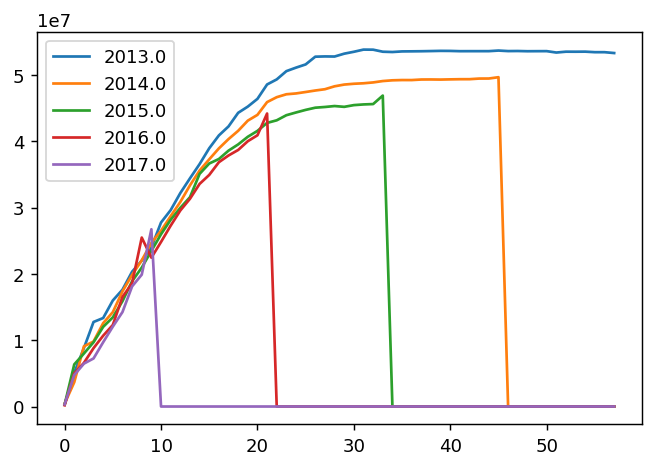

In [292]:
# N.B. df1 is the DataFrame we used before, just without the totals row and column and without being transposed

ax = df1.plot.line()

# "print" the graph
plt.show()

### Add the axis labels, etc

You may want to clean up the graph a bit by adding axes labels and a title.  
It might also be worth changing the settings so all your graphs appear bigger.  
You may also want to be able to save the graph as an image.  
If you are struggling with this, or want to know more, the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) will help, and so will the [pandas.DataFrame.plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

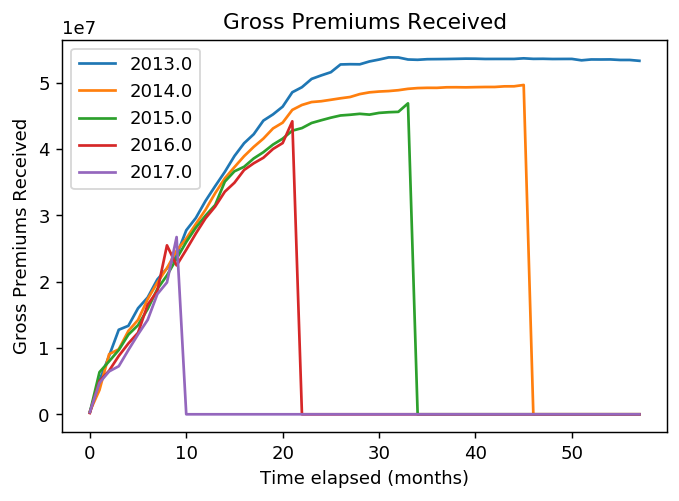

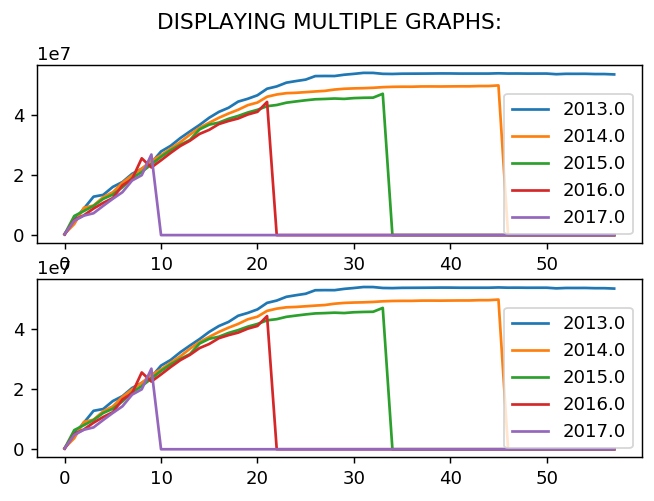

In [293]:
# makes our graph a little bit bigger
plt.rcParams['figure.dpi'] = 130

# plot our dataframe  
ax = df1.plot.line()

# create axes labels and title the graph
ax.set(xlabel='Time elapsed (months)', ylabel='Gross Premiums Received', title='Gross Premiums Received')

# this will save the graph as an image, search in the directory you are in and open it
plt.savefig('gross_prem_graph.png')

# if you wanted to plot multiple graphs in the same figure, this is also possible 
# if you wanted to display the graphs as next to each other, change fig, axes = plt.subplots(1,2)
fig1 , axes = plt.subplots(2)

#setting a figure title
fig1.suptitle('DISPLAYING MULTIPLE GRAPHS:')

# im just plotting the same graph twice. If you want to plot different ones, change the df1 to the name of a different DataFrame
df1.plot(ax= axes[0]) 
df1.plot(ax= axes[1]) 

# "print" the graphs
plt.show()

# Gross Incurred Claims

Now, lets progress onto the Gross Incurred Claims column.    
Remember, the data.csv file is still stored in the DataFrame called df, so we don't need to read the file again.  

You may have noticed that a lot of the code we did in the previous sections is quite general, and we could repurpose a lot of it for this column.
Lets make some functions - these allow us to re-use code.

## Functions

We still will need to create the new DataFrame using the columns we need manually. The function we will make will do pretty much the exact same thing as what we did in the "Extracting the data we need" and the "More data!" sections for Gross Premiums Received. In addition to this though, it will also convert the dictionary we create into a dataframe.  
Most of the code below should look familiar, I have just taken out the comments and introduced a few new variables to make it more general.

Any new piece of code will have a comment.

In [294]:
# here we are creating a new, smaller dataframe, and storing only the 2 columns we need in it 
year_and_gross_incurred = df[['Underwriting YoA','Gross Incurred Claims']].copy()

# uncomment the line below if you would like to see what the new DataFrame looks like
#display(year_and_gross_incurred)

# in this function, we create a new DataFrame, using a different DataFrame as a parameter (later, we will call the function
# with the year_and_gross_Incurred DataFrame we just made
def createTriangleDataFrame(originalDF):
    #The outlined block below is almost exactly the same as in the "Extracting the data we need" section
    #__________________________________________________________________________________________________________________________
    length_of_time = []
    years = []
    current_year_selected = originalDF['Underwriting YoA'][0]
    years.append(current_year_selected)
    i = 0
    for year in originalDF['Underwriting YoA']:
        if current_year_selected != year:
            length_of_time.append(i)
            i=0
            current_year_selected = year
            years.append(year)
        i += 1
    length_of_time.append(i)
    #__________________________________________________________________________________________________________________________
    #The outlined block of data below is almost the exact same as the "More data!" section 
    #__________________________________________________________________________________________________________________________
    originalDFDictionary = {}
    j=0
    for year in years:
        i = years.index(year)
        ref_time_unit_list = []
        #the line below is new, basically we are just extracting the name of the desired column from the dataframe
        target_column = originalDF.columns.values.tolist()[1]
        for time_unit in range(length_of_time[i]):
            ref_time_unit_list.append(int(originalDF[target_column][j]))
            originalDFDictionary[year] = ref_time_unit_list
            j+=1
    #__________________________________________________________________________________________________________________________
    #The outlined block of data below is almost the exact same as the first half of the "Convert the dictionary into a dataframe"
    #__________________________________________________________________________________________________________________________
    temp_array = length_of_time.copy()
    temp_array.sort()
    largest_array_size = temp_array[len(temp_array)-1]
    for year in originalDFDictionary:
        for i in range(largest_array_size - len(originalDFDictionary[year])):
            originalDFDictionary[year].append(0)
    # a function returns exactly one thing. we are returning our updated DataFrame        
    return pd.DataFrame(originalDFDictionary)
    #__________________________________________________________________________________________________________________________


# we assign the return value from our createTriangleDataFrame function and assign it to a new variable
df_year_and_gross_incurred = createTriangleDataFrame(year_and_gross_incurred)
display(df_year_and_gross_incurred)

# if you want to prove to yourself it does the same as the other one (remember this is before we transpose it!) comment out the 
# 2 lines above and uncomment the 2 lines below to see it work for Gross Premiums Received

#df_year_and_gross_premiums_received = createTriangleDataFrame(year_and_gross_premiums_received)
#display(df_year_and_gross_premiums_received)


,2013.0,2014.0,2015.0,2016.0,2017.0
0,0,0,1960,21443,20425
1,112500,433,16208,60130,47587
2,183023,14894,23528,115003,173139
3,259558,95591,397588,180221,262230
4,509828,200019,417307,311315,334306
5,759277,538744,870758,402268,687749
6,1115204,919686,1496336,688563,1011248
7,1832746,969792,1899844,1372081,1397151
8,3068456,2723357,3858497,2445388,1772532
9,7017086,3267343,4751811,2644478,3930626


## Transposing and totals function

Lets create another function that will take a dataframe as input, insert the totals columns and transpose it

In [295]:
def totalsAndTranspose(originalDF): 
    #create a new dataframe, so we can still use the original without totals for graphing
    copyDF = originalDF.copy()
    #we will add a 'Total' row
    copyDF.loc['Total1'] = copyDF.sum(numeric_only = True, axis = 0)
    #This will add a 'Total' column
    copyDF.loc[:,'Total2'] = copyDF.sum(numeric_only = True, axis = 1)
    #we will transpose it to get the orientation we want
    return copyDF.transpose()

#call the function we just created with df_year_and_gross_incurred
display(totalsAndTranspose(df_year_and_gross_incurred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,Total1
2013.0,0,112500,183023,259558,509828,759277,1115204,1832746,3068456,7017086,7436945,8606379,7487114,8549561,9344216,10885200,11853156,12466380,13561164,14567469,15432746,16702028,16606548,17579265,18053889,18753905,18869535,19702605,20003372,20950432,21597067,21888273,21669313,22144025,22471190,22466988,22535259,22498453,22611471,22653670,22746895,22660945,22674640,22811380,22764346,22608762,22562302,22586879,22343285,22322502,22330182,22460708,22562529,22548881,22665350,22688224,22680747,22735758,931559611
2014.0,0,433,14894,95591,200019,538744,919686,969792,2723357,3267343,3407944,5354752,5460818,7023747,7316820,8403875,9189445,9965836,10753916,11509100,13154525,15025730,16112966,16756258,18042007,18844068,19084337,19393678,19972227,20501983,20266220,25076450,20783452,20850143,21314926,21346720,21350334,21331634,21428109,21467750,21382902,21534283,21581489,21578314,21607076,21814915,0,0,0,0,0,0,0,0,0,0,0,0,608718608
2015.0,1960,16208,23528,397588,417307,870758,1496336,1899844,3858497,4751811,5336823,6767157,7170687,7787018,9297143,9674942,10184319,10340450,10756159,11324247,11586674,11968393,12782999,12965060,13485513,13847230,15275500,15404439,15902249,16152478,16722160,17061216,17634945,18289966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,311451604
2016.0,21443,60130,115003,180221,311315,402268,688563,1372081,2445388,2644478,5703228,6485711,7261015,8453855,9519276,11706128,11953533,12423675,13394730,13911421,13949757,17888478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140891697
2017.0,20425,47587,173139,262230,334306,687749,1011248,1397151,1772532,3930626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9636993
Total2,43828,236858,509587,1195188,1772775,3258796,5231037,7471614,13868230,21611344,21884940,27213999,27379634,31814181,35477455,40670145,43180453,45196341,48465969,51312237,54123702,61584629,45502513,47300583,49581409,51445203,53229372,54500722,55877848,57604893,58585447,64025939,60087710,61284134,43786116,43813708,43885593,43830087,44039580,44121420,44129797,44195228,44256129,44389694,44371422,44423677,22562302,22586879,22343285,22322502,22330182,22460708,22562529,22548881,22665350,22688224,22680747,22735758,2002258513


##  Displaying Graphs Again

The below is very similar to the section inside Gross Premiums Received.  
See if you can save the figure as an image called "gross_incurred_graph.png"

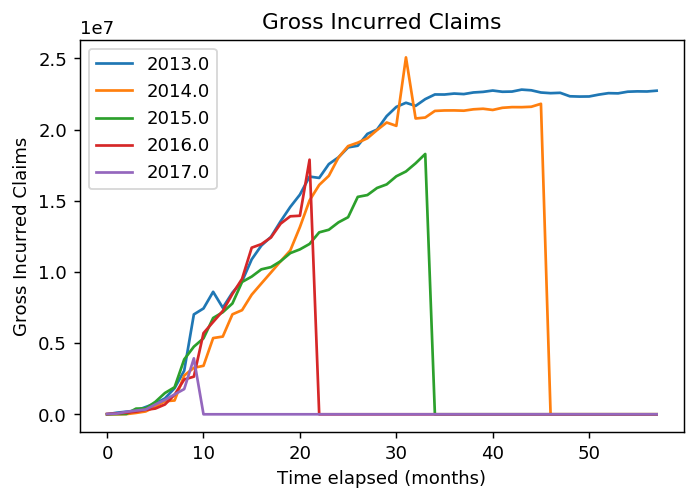

In [296]:
# plot our dataframe  
ax = df_year_and_gross_incurred.plot.line()

# create axes labels and title the graph
ax.set(xlabel='Time elapsed (months)', ylabel='Gross Incurred Claims', title='Gross Incurred Claims')

#save the figure as an image below this comment (before plt.show())

plt.show()

# Gross Paid Claims

Now, lets progress onto displaying the triangle and graph for the Gross Paid claims column.

This should be easy with our functions! :)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,Total1
2013.0,0,112500,124813,153152,199386,371695,558040,967848,1277353,2625446,2883994,4001752,4283123,5202063,5837197,6822248,7484739,8454242,9003087,9639517,11131810,12273968,12584050,13447315,13829838,14757924,15409752,16157438,16983419,17403454,18078862,18659279,18528513,18703240,18882174,19304416,19481446,19630267,19810061,19847457,20015211,20024855,20355045,20580888,20666433,20731381,20823818,20914999,20922749,21105841,21122431,21140731,21288996,21294942,21506043,21532392,21526132,21625972,782085737
2014.0,0,0,4663,41217,88016,358287,697917,773569,1088687,1477936,1599831,1983457,2387647,3663583,4597111,5575191,6355885,7131460,7977821,9232363,10430772,12047907,13760905,14102998,14671679,15119760,15528611,15857003,16595225,16969213,17139188,17576821,18129304,18517718,19142982,19239497,19350580,19420672,19606098,19682519,19704006,19793319,20060281,20168708,20200774,20480758,0,0,0,0,0,0,0,0,0,0,0,0,508331939
2015.0,1960,16208,23528,56876,313208,407098,625755,760768,1398401,2324353,2770586,3654319,4195765,4818285,6725715,7091523,7667665,7924457,8594791,8951172,9210197,9672317,10314138,10642198,11107037,11436003,11688378,11913475,12413423,12627112,13196155,13558727,14144553,15272204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235518350
2016.0,21443,29074,64746,95592,202753,293918,434659,932462,1486359,1615246,1959612,2633750,2802108,3558969,4686163,5248684,6119686,6569760,7939955,8560071,9955898,11799686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77010594
2017.0,11655,28025,101185,136141,147393,384807,603797,855912,1269396,2642138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6180449
Total2,35058,185807,318935,482978,950756,1815805,2920168,4290559,6520196,10685119,9214023,12273278,13668643,17242900,21846186,24737646,27627975,30079919,33515654,36383123,40728677,45793878,36659093,38192511,39608554,41313687,42626741,43927916,45992067,46999779,48414205,49794827,50802370,52493162,38025156,38543913,38832026,39050939,39416159,39529976,39719217,39818174,40415326,40749596,40867207,41212139,20823818,20914999,20922749,21105841,21122431,21140731,21288996,21294942,21506043,21532392,21526132,21625972,1609127069


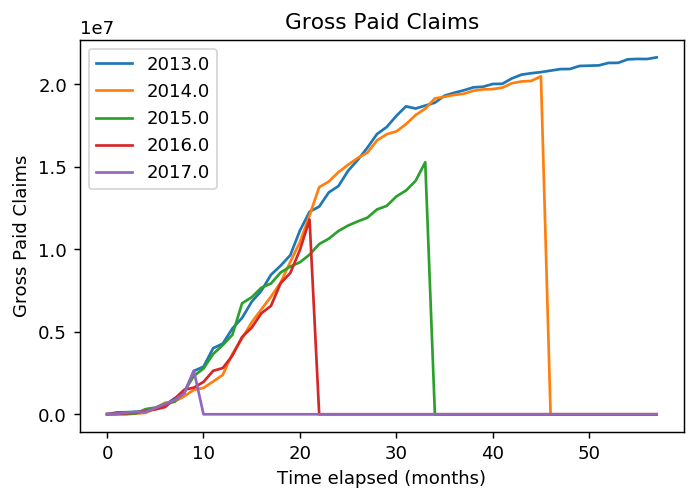

In [297]:
# get the columns we need
year_and_gross_paid = df[['Underwriting YoA','Gross Paid Claims']].copy()

# use the functions we made before
df_year_and_gross_paid = createTriangleDataFrame(year_and_gross_paid)
display(totalsAndTranspose(df_year_and_gross_paid))

#create a graph
ax = df_year_and_gross_paid.plot.line()
ax.set(xlabel='Time elapsed (months)', ylabel='Gross Paid Claims', title='Gross Paid Claims')
plt.show()